In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import os
from utils import *

ModuleNotFoundError: No module named 'torch'

In [2]:
def inside_mask(mask, image):
    mask = np.stack([mask, mask, mask], axis=2)
    mask_image =mask*image
    return mask_image
def decoupage_texte2(lien):
    return lien.split("/")[-1],lien.split("/")[-2],lien.split("/")[-3]
def telecharger_jpg2(picture,num):
    cv2.imwrite("defile_vogue/tres_traitee/"+num+".png", cv2.cvtColor(picture, cv2.COLOR_RGBA2BGRA))

In [4]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "C:/Users/alari/Documents/Code/Vogue/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)


folder_path = "defile_vogue/traitee"
file_names = os.listdir(folder_path)


print(file_names) 

c:\Users\alari\Documents\Code\Vogue\vogue_env\Lib\site-packages\segment_anything\build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg', '1001.jpg', '1002.jpg', '1003.jpg', '1004.jpg', '1005.jpg', '1006.jpg', '1007.jpg', '1008.jpg', '1009.jpg', '101.jpg', '1010.jpg', '1011.jpg', '1012.jpg', '1013.jpg', '1014.jpg', '1015.jpg', '1016.jpg', '1017.jpg', '1018.jpg', '1019.jpg', '102.jpg', '1020.jpg', '1021.jpg', '1022.jpg', '1023.jpg', '1024.jpg', '1025.jpg', '1026.jpg', '1027.jpg', '1028.jpg', '1029.jpg', '103.jpg', '1030.jpg', '1031.jpg', '1032.jpg', '1033.jpg', '1034.jpg', '1035.jpg', '1036.jpg', '1037.jpg', '1038.jpg', '1039.jpg', '104.jpg', '1040.jpg', '1041.jpg', '1042.jpg', '1043.jpg', '1044.jpg', '1045.jpg', '1046.jpg', '1047.jpg', '1048.jpg', '1049.jpg', '105.jpg', '1050.jpg', '1051.jpg', '1052.jpg', '1053.jpg', '1054.jpg', '1055.jpg', '1056.jpg', '1057.jpg', '1058.jpg', '1059.jpg', '106.jpg', '1060.jpg', '1061.jpg', '1062.jpg', '1063.jpg', '1064.jpg', '1065.jpg', '1066.jpg', '1067.jpg', '1068.jpg', '1069.jpg', '107.jpg', '1070.jpg', '1071.jpg', '1072.jpg', '1073.j

In [5]:
def nombre_image_dossier(dossier):
    return len(os.listdir(dossier))
num_done=nombre_image_dossier("defile_vogue/tres_traitee") 
print(num_done)  

2000


In [16]:
to_add=10
for i in range(num_done,num_done+to_add ):#len(file_names)
    chemin=folder_path+"/"+file_names[i]
    image = cv2.imread(chemin)
    num,saison,designer=decoupage_texte2(chemin)
    num=num.split(".")[0]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    predictor.set_image(image)
    input_box = np.array([image.shape[1]//16, image.shape[0]//16,15*image.shape[1]//16,  15*image.shape[0]//16])

    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=input_box[None, :],
        multimask_output=False,
    )
    mask_image=inside_mask(masks[0], image)
    imagpng=cv2.cvtColor(mask_image, cv2.COLOR_RGB2RGBA)
    for i in imagpng:
        for j in i:
            if j[0] == 0 and j[1] == 0 and j[2] == 0:
                j[3] = 0
    telecharger_jpg2(imagpng,num)
    

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 

In [31]:
from utile_vogue import *


513


(256, 256, 4)


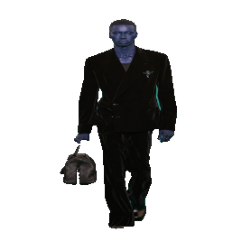

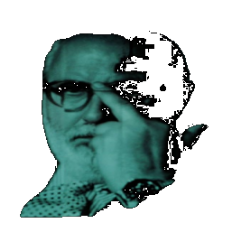

done


In [33]:
gf= open_image("defile_vogue/tres_traitee/1.png")
print(gf.shape)
gf=resize_image(gf)
show_image(gf)
chemin2="best_designer/traitee/513.png"
gf2 = open_image(chemin2)

gf2=resize_image(gf2)
show_image(gf2)
print("done")

C:\Users\alari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

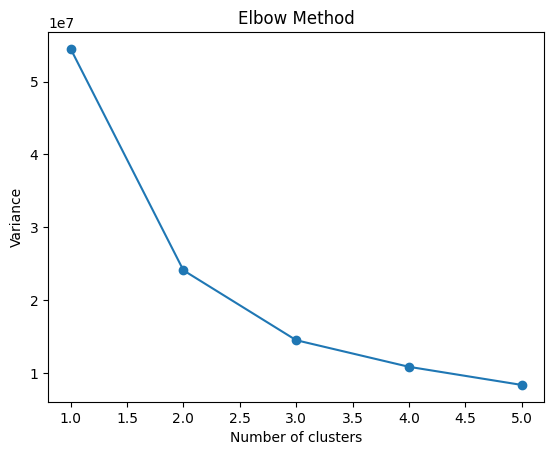

In [43]:
numbers_dominant_color(gf2)

C:\Users\alari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[47, 45, 44], [86, 86, 94], [104, 105, 204]]


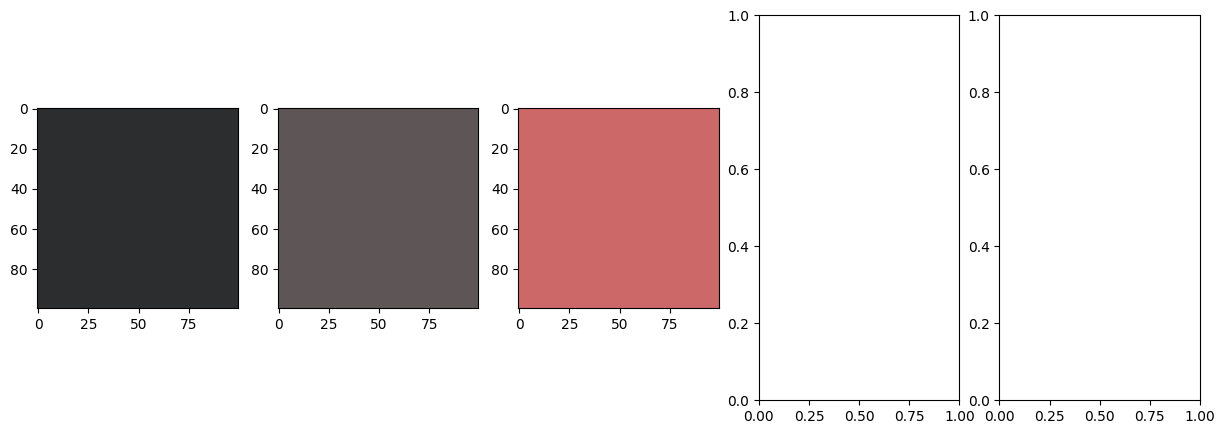

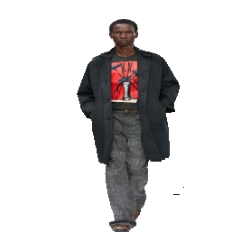

In [44]:
rere=extract_dominant_color(gf2,3)
print(rere)
rere=np.array(rere)
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
for u in range(len(rere)):
    
    color_square = np.ones((100, 100, 3), dtype=np.uint8) * rere[u].astype(np.uint8)
    axes[u].imshow(cv2.cvtColor(color_square, cv2.COLOR_BGRA2RGBA))

plt.show()

plt.figure(figsize=(3, 3))
plt.imshow(cv2.cvtColor(gf2, cv2.COLOR_BGRA2RGBA))
plt.axis('off')
plt.show()

In [22]:
import cv2

def resize_image(image, target_size=(256, 256)):
    return cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)

def decoupage_texte2(lien):
    return lien.split("/")[-1],lien.split("/")[-2],lien.split("/")[-3]

def telecharger_jpg3(picture,num):
    trai='traitee'
    dossier_nom = os.path.join("defile_vogue", trai)
    if not os.path.exists(dossier_nom):
        os.makedirs(dossier_nom)
    cv2.imwrite(dossier_nom+"/"+str(num)+".jpg", picture)

def open_image(location):
    image = cv2.imread(location,cv2.IMREAD_UNCHANGED)
    return image


In [26]:
for i in range(0, len(file_names)):#len(file_names)
    im1=open_image("defile_vogue/non_traitee/"+str(i)+".jpg")
    im1=resize_image(im1)
    telecharger_jpg3(im1,i)

In [10]:
def id_photo_by(df,designer,annee,saison):
    number=df[df['designer']==designer]
    number=number[number['annee']==annee]
    
    number=number[number['saison']==saison]
    return number['id'].tolist()
   
def present_in_folder(folder,liste):
    in_folder=os.listdir(folder)
    file_names = [f"{num}.png" for num in liste]

    present=[item for item in file_names if item in  in_folder]
    number=[item.split('.')[0] for item in present]
    return number  

In [9]:
import pandas as pd
import os
df=pd.read_csv('C:/Users/alari/Documents/Code/VSC/python/pero/information_defile.csv')

id_liste=id_photo_by(df,'jean-paul-gaultier',2013,'fall--ready-to-wear')
print(id_liste)
id_pres=present_in_folder('C:/Users/alari/Documents/Code/VSC/python/pero/defile_vogue/triee/work',id_liste)
print(id_pres)
id_pres_not=present_in_folder('C:/Users/alari/Documents/Code/VSC/python/pero/defile_vogue/triee/not_work',id_liste)
print(id_pres_not)


NameError: name 'id_photo_by' is not defined

In [14]:
unique=df[["designer","saison","annee"]].drop_duplicates()
unique=unique.values
print(unique)

[['A. Potts' 'fall--ready-to-wear' 2024]
 ['A.L.C' 'fall--ready-to-wear' 2024]
 ['A.W.A.K.E. Mode' 'fall--ready-to-wear' 2024]
 ['Aaron Esh' 'fall--ready-to-wear' 2024]
 ['acne-studios' 'fall--ready-to-wear' 2022]
 ['acne-studios' 'fall--ready-to-wear' 2024]
 ['acne-studios' 'spring--ready-to-wear' 2023]
 ['Adam Lippes' 'fall--ready-to-wear' 2024]
 ['Alberta Ferretti' 'fall--ready-to-wear' 2024]
 ['Alejandra Alonso Rojas' 'fall--ready-to-wear' 2024]
 ['Alessandra Rich' 'fall--ready-to-wear' 2024]
 ['Alexander McQueen' 'fall--ready-to-wear' 2024]
 ['alexander-mcqueen' 'fall--ready-to-wear' 2023]
 ['alexander-mcqueen' 'resort-' 2025]
 ['Alexis Mabille' 'fall--ready-to-wear' 2024]
 ['ami' 'spring--menswear' 2025]
 ['bottega-veneta' 'pre-fall-' 2024]
 ['hermes' 'resort-' 2025]
 ['lgn-louis-gabriel-nouchi' 'spring--menswear' 2025]
 ['loewe' 'spring--ready-to-wear' 2010]
 ['loewe' 'spring--ready-to-wear' 2023]
 ['sacai' 'spring--menswear' 2024]
 ['sacai' 'spring--menswear' 2025]
 ['balenciag